In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from datetime import datetime


# Veriyi okuyoruz
df = pd.read_csv('twitter.csv', nrows=1000)


# Zaman damgasını uygun olacak şekilde datetime formatına çeviriyoruz
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')

# Zamanla ilgili özellikleri çıkarıyoruz
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

X = df[['longitude', 'latitude', 'hour', 'day_of_week']]
y = df['timezone']

# Veriyi eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ve Rastgele Orman modelini oluşturup eğitiyoruz
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin yaptırıp performansı değerlendiriyoruz ve sonuçları ekrana yazıyoruz
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.99      0.99      0.99        82
           2       0.99      0.99      0.99        74
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from datetime import datetime

# Veriyi okuyoruz
df = pd.read_csv('twitter.csv', nrows=1000)

# Zaman damgasını uygun olacak şekilde datetime formatına çeviriyoruz
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')

# Zamanla ilgili özellikleri çıkarıyoruz
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Özellikler (X) ve hedef (y) olacak şekilde ayırıyoruz
X = df[['longitude', 'latitude', 'hour', 'day_of_week']]
y = df['timezone']

# Eğitim ve test kümelerini oluşturuyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN sınıflandırıcıyı oluşturuyoruz ve eğitiyoruz
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 en sık kullanılan değerdir
knn.fit(X_train, y_train)

# Tahmin ve değerlendirme kısmı
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.98      1.00      0.99        82
           2       1.00      0.97      0.99        74
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from datetime import datetime

# Veriyi okuyoruz ve rastgele 1000 satır seçiyoruz
df = pd.read_csv('twitter.csv')
df = df.sample(n=10000, random_state=None)  # Her çalıştırmada farklı veri

# Zaman damgasını datetime formatına çeviriyoruz
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')

# Zamanla ilgili özellikleri çıkarıyoruz
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Özellikleri ve hedef değişkeni ayırıyoruz
X = df[['longitude', 'latitude', 'hour', 'day_of_week']]
y = df['timezone']

# Eğitim ve test verisine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Karar ağacı sınıflandırıcısını oluşturup eğit
tree_model = DecisionTreeClassifier(random_state=None)
tree_model.fit(X_train, y_train)

# Tahmin ve performans değerlendirme kısmı
y_pred = tree_model.predict(X_test)
print("\nModel Performansı:")
print(classification_report(y_test, y_pred))




Model Performansı:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1034
           2       0.99      1.00      1.00       600
           3       0.98      0.98      0.98        47
           4       1.00      1.00      1.00       319

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



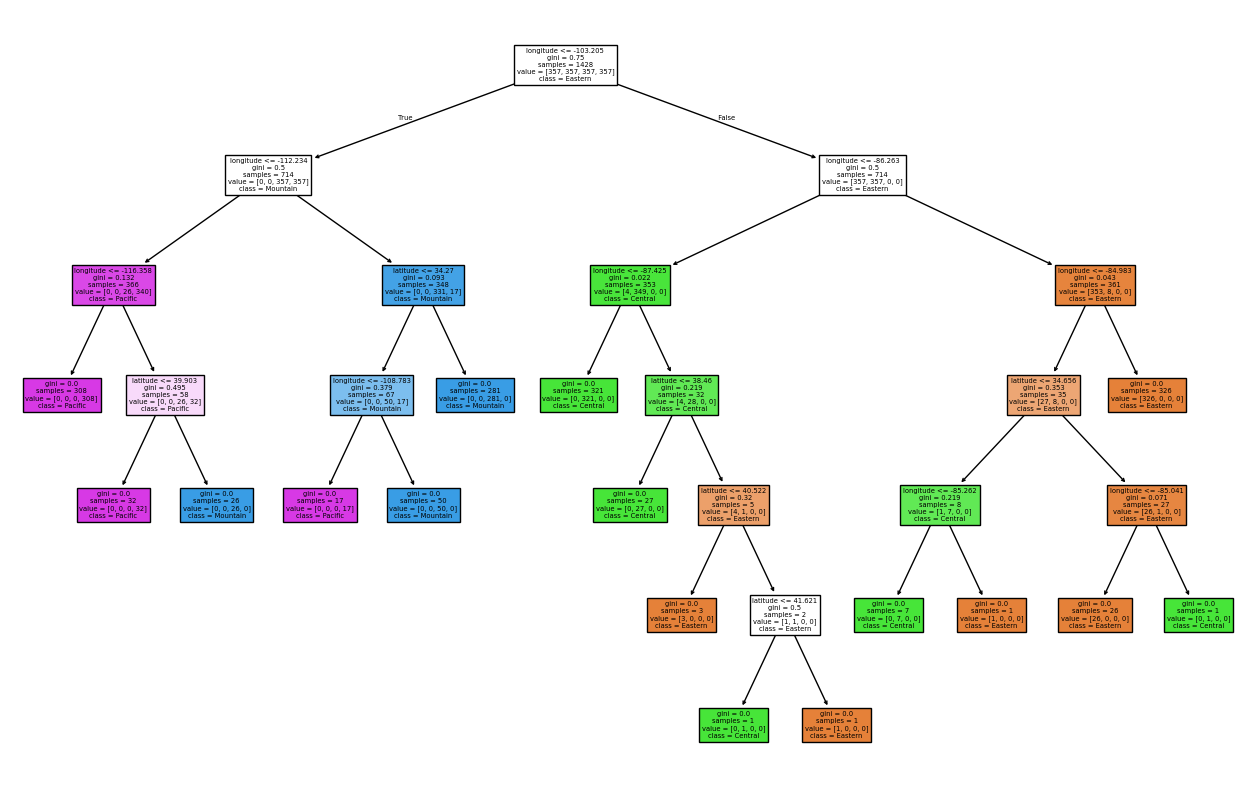

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Eastern', 'Central', 'Mountain', 'Pacific'], filled=True)
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Veriyi okuyoruz
df = pd.read_csv('twitter.csv', nrows=1000)

# Zaman damgasını uygun olacak şekilde datetime formatına çeviriyoruz
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')

# Zamanla ilgili özellikleri çıkarıyoruz
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Özellikleri ve hedef değişkeni ayırıyoruz
X = df[['longitude', 'latitude', 'hour', 'day_of_week']]
y = df['timezone']  # Bu sayısal gibi davranacak

# Veri setini ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin eğitilmesi
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin kısmı
y_pred = model.predict(X_test)

# Regresyon sonuçlarını değerlendiriyoruz
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# İlk 10 tahmini karşılaştıralım
df_results = pd.DataFrame({'Gerçek': y_test[:10].values, 'Tahmin': y_pred[:10]})
print(df_results)


Mean Squared Error: 0.08643367175853695
R² Score: 0.9261187522364843
   Gerçek    Tahmin
0       2  2.368061
1       1  0.516081
2       1  0.798205
3       4  3.756366
4       1  1.147902
5       4  3.834687
6       1  0.907078
7       2  1.874395
8       4  3.570019
9       1  1.356153


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from datetime import datetime

# Veriyi okuyoruz
df = pd.read_csv('twitter.csv', nrows=1000)

# Zaman damgasını uygun olacak şekilde datetime formatına çeviriyoruz
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')

# Zamanla ilgili özellikleri çıkarıyoruz
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Özellikler ve hedef değişkenler
X = df[['longitude', 'latitude', 'hour', 'day_of_week']]
y = df['timezone']

# Eğitim ve test setlerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes modeli
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Tahmin ve değerlendirme kısmı
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.88      1.00      0.94        82
           2       1.00      0.85      0.92        74
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36

    accuracy                           0.94       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.95      0.94      0.94       200



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from datetime import datetime

# Veriyi okuyoruz
df = pd.read_csv('twitter.csv', nrows=1000)

# Zaman damgasını uygun olacak şekilde datetime formatına çeviriyoruz
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')

# Zamanla ilgili özellikleri çıkarıyoruz
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Özellikler ve hedef değişkenler
X = df[['longitude', 'latitude', 'hour', 'day_of_week']]
y = df['timezone']

# Veriyi ölçeklendiriyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hedef değişkeni kategorik sınıflar için One-Hot encode ediyoruz
y_categorical = to_categorical(y - 1)  # Zaman dilimleri 1-4 olduğu için -1 yaptık

# Veriyi ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Modeli oluşturuyoruz
model = Sequential()
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 sınıf olduğu için

# Modeli derliyoruz
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitim
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Ve değerlendirme kısmı
loss, accuracy = model.evaluate(X_test, y_test)
print("Test doğruluğu:", accuracy)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0933 - loss: 1.5618 - val_accuracy: 0.2875 - val_loss: 1.3886
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2166 - loss: 1.3782 - val_accuracy: 0.5000 - val_loss: 1.2475
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5758 - loss: 1.2449 - val_accuracy: 0.6875 - val_loss: 1.1383
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6074 - loss: 1.1498 - val_accuracy: 0.7125 - val_loss: 1.0280
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6691 - loss: 1.0266 - val_accuracy: 0.7250 - val_loss: 0.9073
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7045 - loss: 0.8970 - val_accuracy: 0.8000 - val_loss: 0.7780
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7713 - loss: 0.7996 - val_accuracy: 0.8250 - val_loss: 0.6636
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7957 - loss: 0.6717 - val_accuracy: 0.8500 - val_loss: 0.5710
Ep